In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df=pd.read_csv('/content/Sleep_Efficiency.csv',index_col='Bedtime' ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (388, 14)


,ID,Age,Gender,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
Bedtime,,,,,,,,,,,,,,
2021-03-06 01:00:00,1,65,Female,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
2021-12-05 02:00:00,2,69,Male,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2021-05-25 21:30:00,3,40,Female,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
2021-11-03 02:30:00,4,40,Female,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
2021-03-13 01:00:00,5,57,Male,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-16 23:00:00,446,30,Female,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0
2021-11-13 22:00:00,448,27,Female,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
2021-03-31 21:00:00,449,52,Male,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0


<Axes: xlabel='Bedtime'>

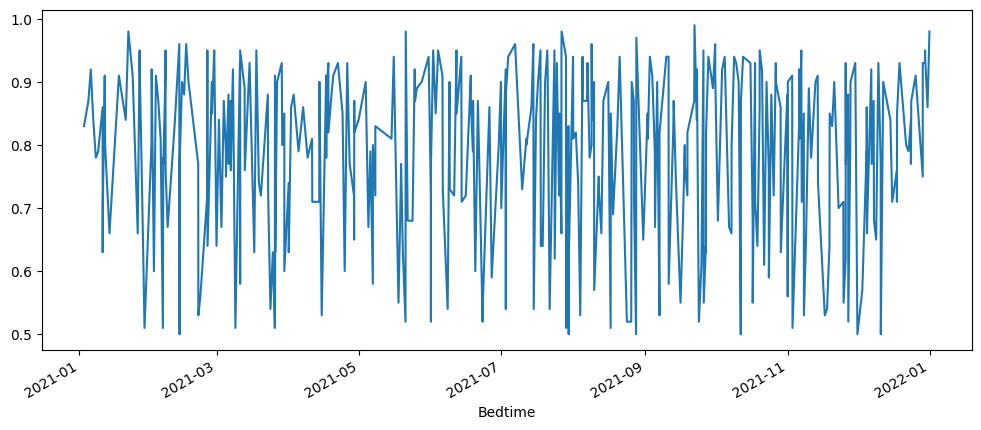

In [ ]:
df['Sleep efficiency'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Sleep efficiency'])

1. ADF :  -12.816564788490636
2. P-Value :  6.282000661013602e-24
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 386
5. Critical Values :
	 1% :  -3.447405233596701
	 5% :  -2.8690569369014605
	 10% :  -2.5707743450830893


In [ ]:
from pmdarima import auto_arima

# Fit SARIMA model using auto_arima
stepwise_fit = auto_arima(df['Sleep efficiency'], seasonal=True, trace=True, suppress_warnings=True)

# Get the best SARIMA model
sarima_model = stepwise_fit.to_dict()['order']
sarima_seasonal_order = stepwise_fit.to_dict()['seasonal_order']

print("Best SARIMA model order:", sarima_model)
print("Best SARIMA seasonal order:", sarima_seasonal_order)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-448.491, Time=2.92 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-445.780, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-447.435, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-446.696, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=930.717, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-450.312, Time=1.93 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-451.270, Time=0.70 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-450.151, Time=0.61 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-449.274, Time=1.90 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-448.350, Time=3.83 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=352.412, Time=0.35 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 12.995 seconds
Best SARIMA model order: (0, 0, 2)
Best SARIMA seasonal order: (0, 0, 0, 0)


In [ ]:
from pmdarima import auto_arima

# Fit SARIMA model using auto_arima
stepwise_fit = auto_arima(train['Sleep efficiency'], seasonal=True, m=20, trace=True, suppress_warnings=True)

# Get the best SARIMA model order parameters
best_order = stepwise_fit.order
best_seasonal_order = stepwise_fit.seasonal_order

print("Best SARIMA model order parameters (p, d, q):", best_order)
print("Best SARIMA seasonal order parameters (P, D, Q, s):", best_seasonal_order)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[20] intercept   : AIC=inf, Time=7.40 sec
 ARIMA(0,0,0)(0,0,0)[20] intercept   : AIC=-393.959, Time=0.17 sec
 ARIMA(1,0,0)(1,0,0)[20] intercept   : AIC=-394.698, Time=5.17 sec
 ARIMA(0,0,1)(0,0,1)[20] intercept   : AIC=-393.833, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[20]             : AIC=836.728, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[20] intercept   : AIC=-396.516, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[20] intercept   : AIC=-394.744, Time=1.07 sec
 ARIMA(1,0,0)(1,0,1)[20] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(2,0,0)(0,0,0)[20] intercept   : AIC=-398.965, Time=0.14 sec
 ARIMA(2,0,0)(1,0,0)[20] intercept   : AIC=-393.773, Time=3.51 sec
 ARIMA(2,0,0)(0,0,1)[20] intercept   : AIC=-397.109, Time=2.04 sec
 ARIMA(2,0,0)(1,0,1)[20] intercept   : AIC=inf, Time=3.64 sec
 ARIMA(3,0,0)(0,0,0)[20] intercept   : AIC=-397.312, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[20] intercept   : AIC=-397.309, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[20] intercept 

In [ ]:
print(df.shape)
train=df.iloc[:-40]
test=df.iloc[-40:]
print(train.shape,test.shape)

(388, 14)
(348, 14) (40, 14)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters
order = best_order  # Non-seasonal order (p, d, q)
seasonal_order = best_seasonal_order # Seasonal order (P, D, Q, s), assuming a seasonal period of 12 (monthly data)

# Fit SARIMA model
sarima_model = SARIMAX(train['Sleep efficiency'], order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Print SARIMA model summary
print(sarima_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:       Sleep efficiency   No. Observations:                  348
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 138.338
Date:                Tue, 09 Apr 2024   AIC                           -270.677
Time:                        12:38:54   BIC                           -259.120
Sample:                             0   HQIC                          -266.076
                                - 348                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3869      0.047      8.197      0.000       0.294       0.479
ar.L2          0.6007      0.047     12.673      0.000       0.508       0.694
sigma2         0.0262      0.002     12.080      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

<Axes: xlabel='Bedtime'>

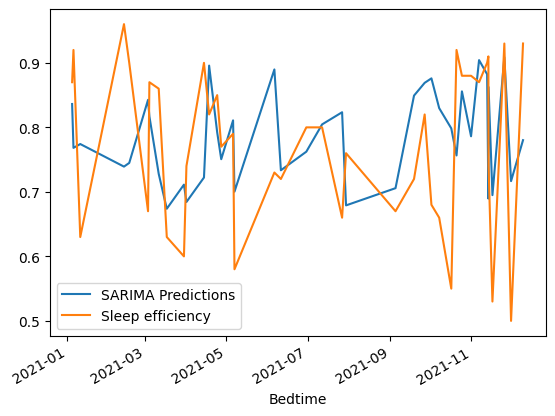

In [ ]:
# Specify start and end points for predictions
start = len(train)  # Start index for predictions
end = len(train) + len(test) - 1  # End index for predictions

sarima_model = SARIMAX(train['Sleep efficiency'] , order = best_order, seasonal_order = best_seasonal_order)
sarima_model_fit = sarima_model.fit()

# Generate SARIMA predictions
sarima_pred = sarima_model_fit.predict(start=start, end=end, typ='levels').rename('SARIMA Predictions')

# Set index of predictions to match the dates in the test dataset
sarima_pred.index = test.index

#print(sarima_pred)

# Plot SARIMA predictions and test data
sarima_pred.plot(legend=True)
test['Sleep efficiency'].plot(legend=True)